In [3]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

## Per layer

In [4]:
with open('/home/jovyan/shares/SR004.nfs2/chekalina/FisherKronecker/bert_cola/results/resultsone.json', 'r') as fp:
    d = json.load(fp)

In [5]:
d['kron'].keys()

dict_keys(['1 intermediate dense', '2 intermediate dense', '3 intermediate dense', '4 intermediate dense', '5 intermediate dense', '6 intermediate dense', '7 intermediate dense', '8 intermediate dense', '9 intermediate dense', '10 intermediate dense', '11 intermediate dense', '1 output dense', '2 output dense', '3 output dense', '4 output dense', '5 output dense', '6 output dense', '7 output dense', '8 output dense', '9 output dense', '10 output dense', '11 output dense'])

In [6]:
d['svd'].keys()

dict_keys(['1 intermediate dense', '2 intermediate dense', '3 intermediate dense', '4 intermediate dense', '5 intermediate dense', '6 intermediate dense', '7 intermediate dense', '8 intermediate dense', '9 intermediate dense', '10 intermediate dense', '11 intermediate dense', '1 output dense', '2 output dense', '3 output dense', '4 output dense', '5 output dense', '6 output dense', '7 output dense', '8 output dense', '9 output dense', '10 output dense', '11 output dense'])

In [7]:
d['svd']['1 intermediate dense']

[0.5649960305097885,
 0.5701743615529957,
 0.5625821583056989,
 0.5469451017688902,
 0.5417325184178179,
 0.5313214843751437,
 0.534651745101329]

In [8]:
svd_layers = [d['svd'][key] for key in d['svd'].keys()]
kron_layers = [d['kron'][key] for key in d['kron'].keys()]
fwswd_layers = [d['fwsvd'][key] for key in d['fwsvd'].keys()]

In [9]:
ranks = [1, 5, 10, 50, 100, 250, 500]

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

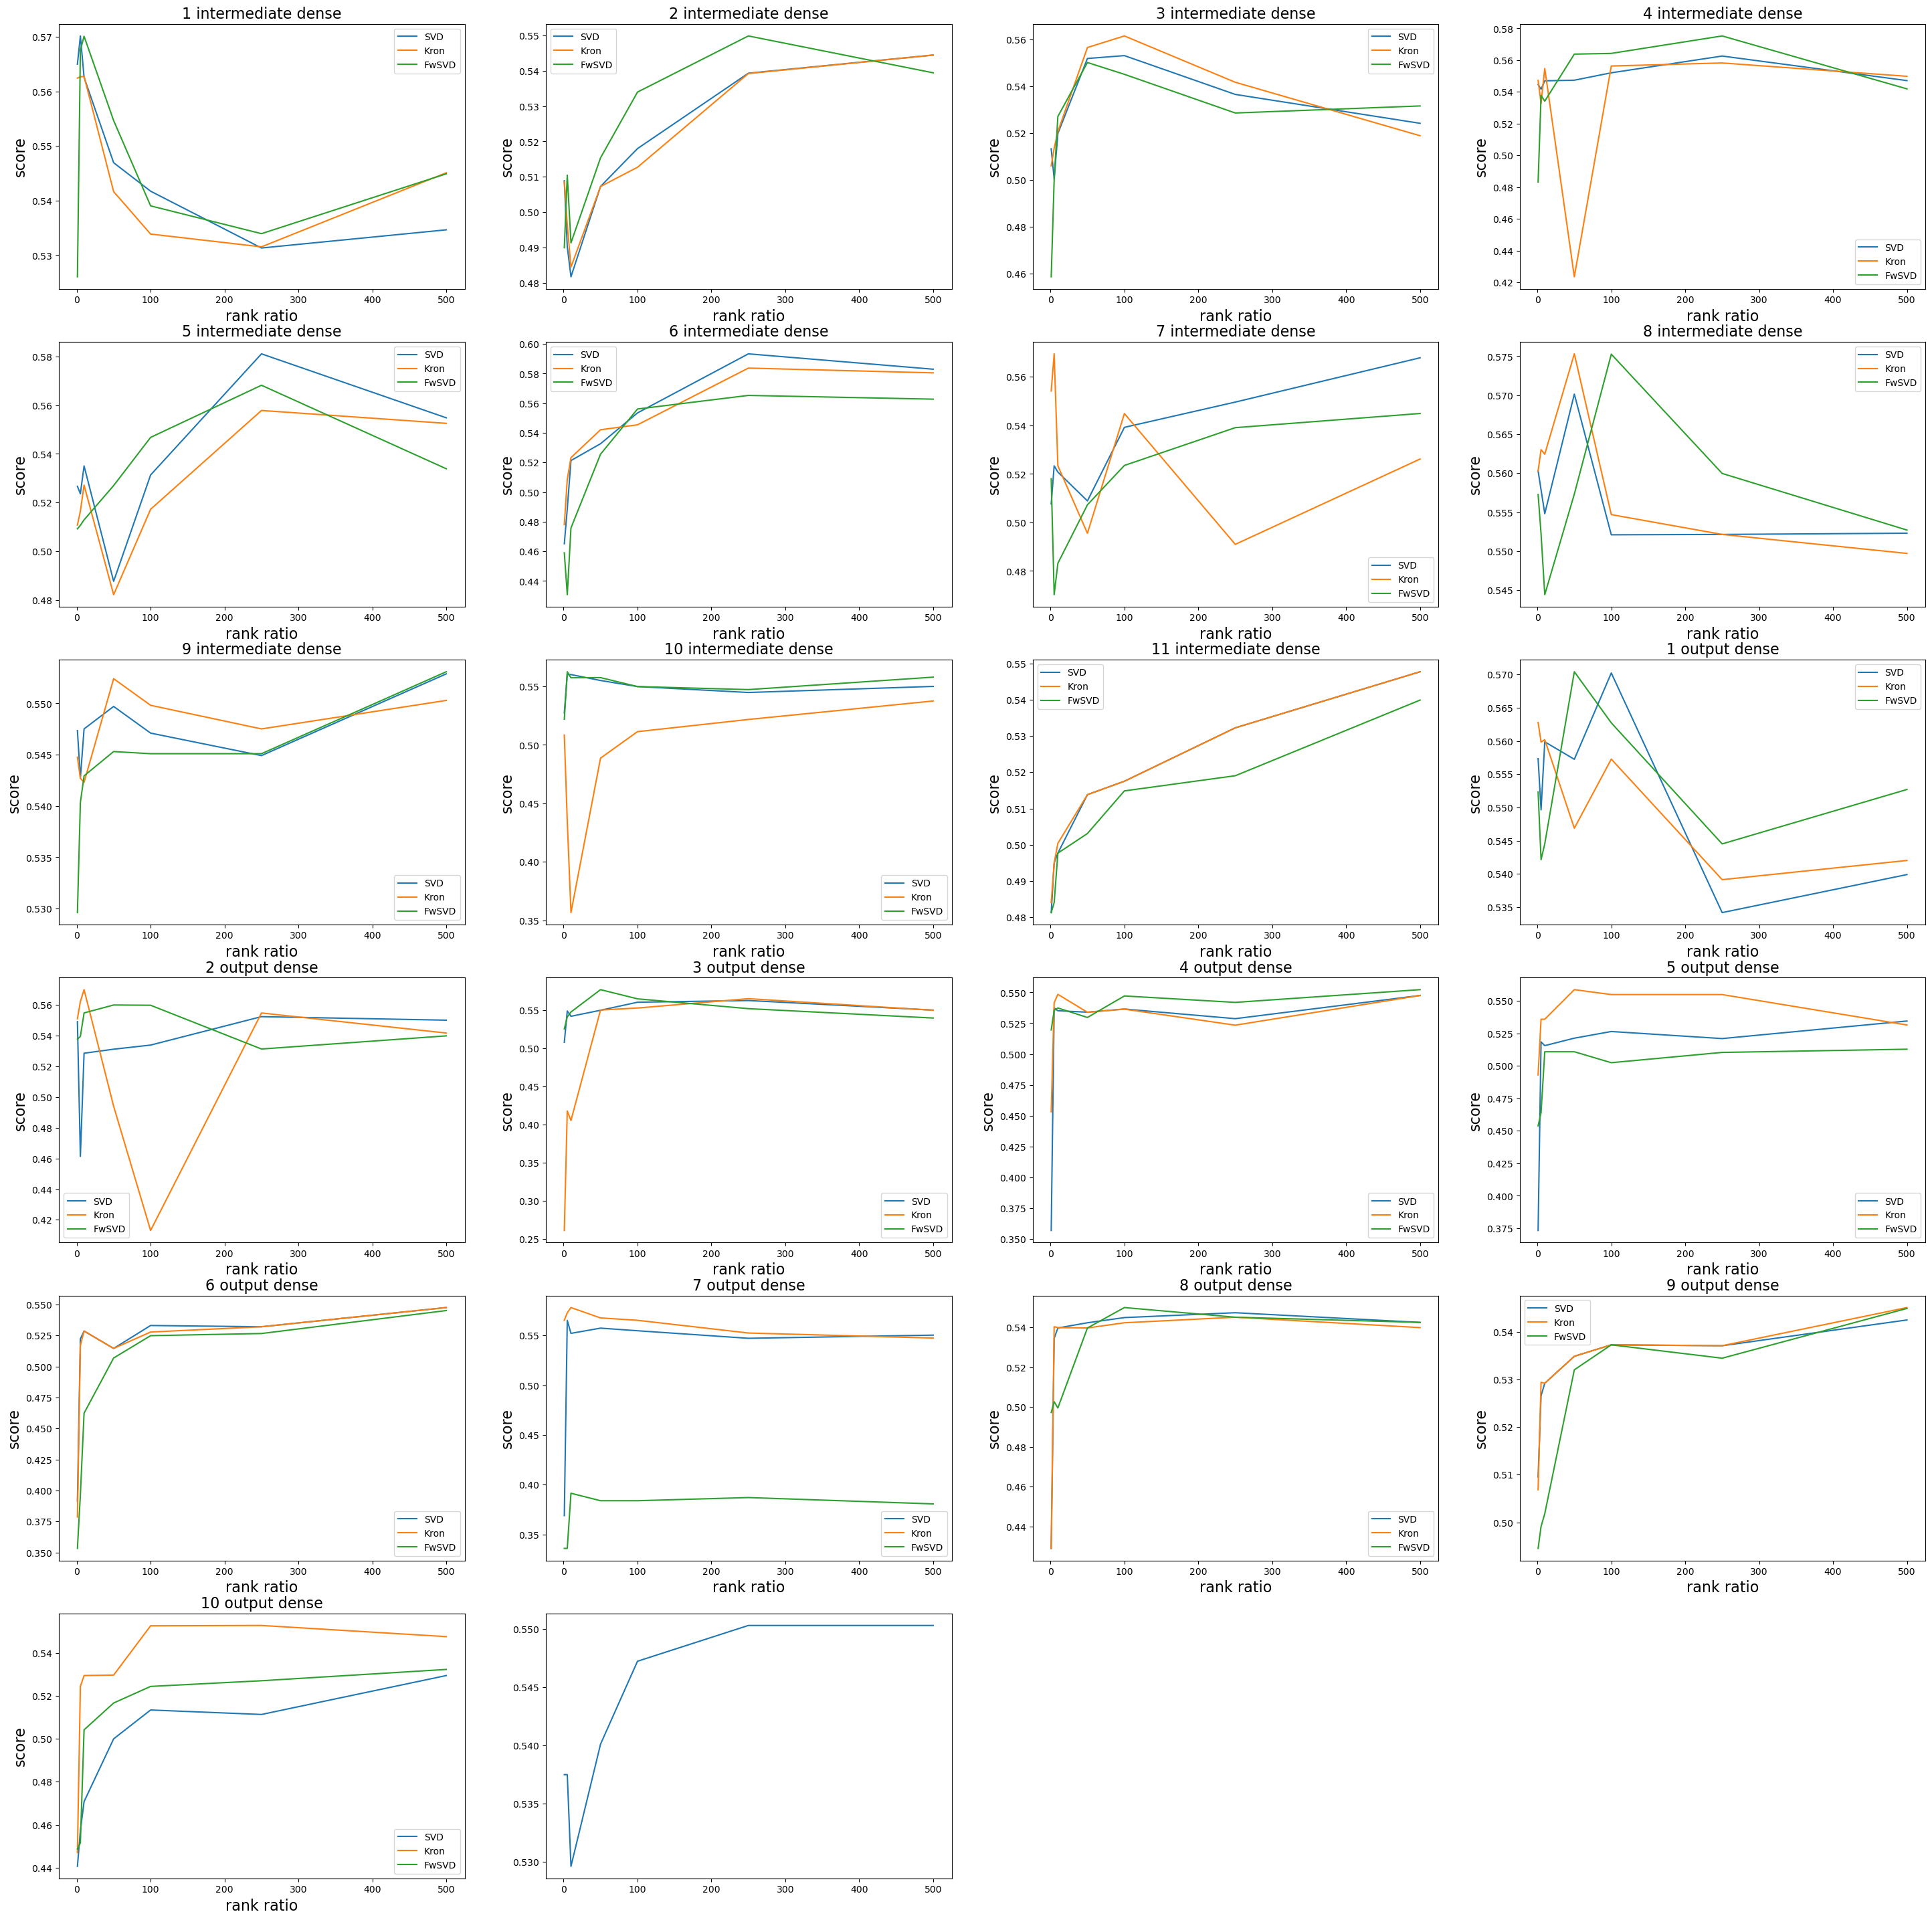

In [10]:
fig = plt.figure(figsize=(36, 36))
for i in range(0, 22):
    ax = plt.subplot(6, 4, i+1)
    # plot lines
    ax.plot(ranks, svd_layers[i], label = "SVD")
    ax.plot(ranks, kron_layers[i], label = "Kron")
    ax.plot(ranks, fwswd_layers[i], label = "FwSVD")
    ax.legend()
    ax.set_xlabel('rank ratio',fontsize=16)
    ax.set_ylabel('score',fontsize=16)
    name = str(list(d['kron'].keys())[i])
    ax.set_title(name,fontsize=16)
    
plt.legend()
plt.show()

## Full

In [37]:
with open('/home/jovyan/shares/SR004.nfs2/chekalina/FisherKronecker/bert_cola/results/resultsoneall.json', 'r') as fp:
    d = json.load(fp)

d['svd'].keys()

dict_keys(['all'])

In [39]:
d

{'svd': {'all': [0.0,
   0.0,
   0.15193752756982323,
   0.013435857939927104,
   0.16552668732462994,
   0.5332376474038539,
   0.5811202551820686]},
 'fwsvd': {'all': [0.0,
   0.0,
   0.0,
   0.08036809130702588,
   0.23087386314732647,
   0.34029898520227075,
   0.35828357969563823]},
 'kron': {'all': [0.0463559874942472,
   0.0463559874942472,
   0.0,
   0.21294679513800222,
   0.37660719793618375,
   0.49056348413040757,
   0.5478284532595203]}}

In [40]:
ranks = [5, 10, 50, 100, 250, 500, 600]

In [41]:
svd_layers = [d['svd'][key] for key in d['svd'].keys()]
kron_layers = [d['kron'][key] for key in d['kron'].keys()]
fwswd_layers = [d['fwsvd'][key] for key in d['fwsvd'].keys()]

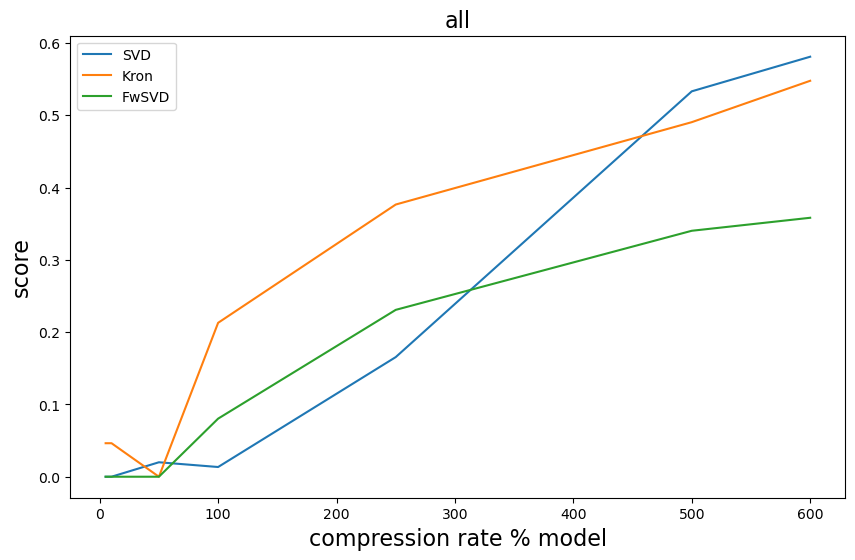

In [45]:
fig = plt.figure(figsize=(10, 6))
plt.plot(ranks, svd_layers[0], label = "SVD")
plt.plot(ranks, kron_layers[0], label = "Kron")
plt.plot(ranks, fwswd_layers[0], label = "FwSVD")
plt.legend()
plt.xlabel('compression rate % model',fontsize=16)
plt.ylabel('score',fontsize=16)
name = str(list(d['svd'].keys())[0])
plt.title(name,fontsize=16)

plt.legend()
plt.show()

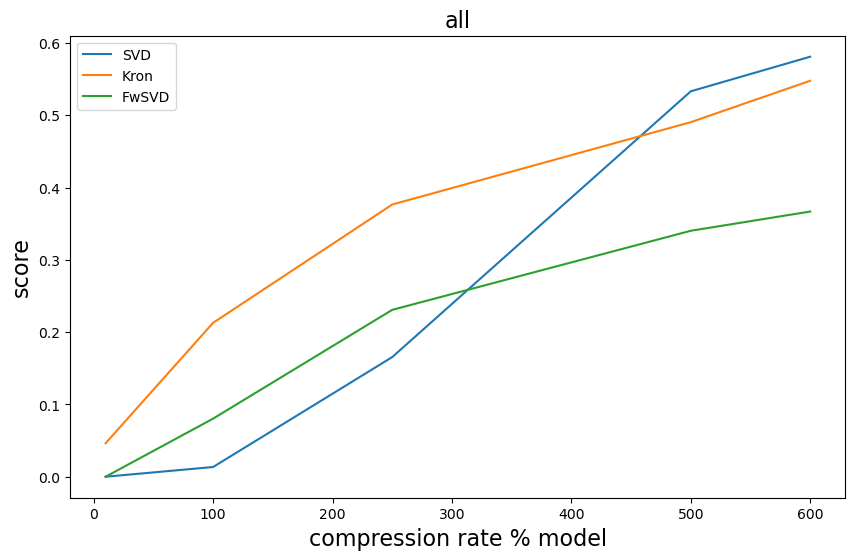

In [36]:
fig = plt.figure(figsize=(10, 6))
plt.plot(ranks, svd_layers[0], label = "SVD")
plt.plot(ranks, kron_layers[0], label = "Kron")
plt.plot(ranks, fwswd_layers[0], label = "FwSVD")
plt.legend()
plt.xlabel('compression rate % model',fontsize=16)
plt.ylabel('score',fontsize=16)
name = str(list(d['svd'].keys())[0])
plt.title(name,fontsize=16)

plt.legend()
plt.show()

In [43]:
with open('resultsobratno.json', 'r') as fp:
    d = json.load(fp)

d['svd'].keys()

dict_keys(['4', '34', '423'])

In [44]:
svd_l_2 = [d['svd']['4'], d['svd']['34'], d['svd']['423']]
kron_l_2 = [d['kron']['4'], d['kron']['34'], d['kron']['423']]
fwswd_l_2 = [d['fwsvd']['4'],d['fwsvd']['34'],d['fwsvd']['423']]

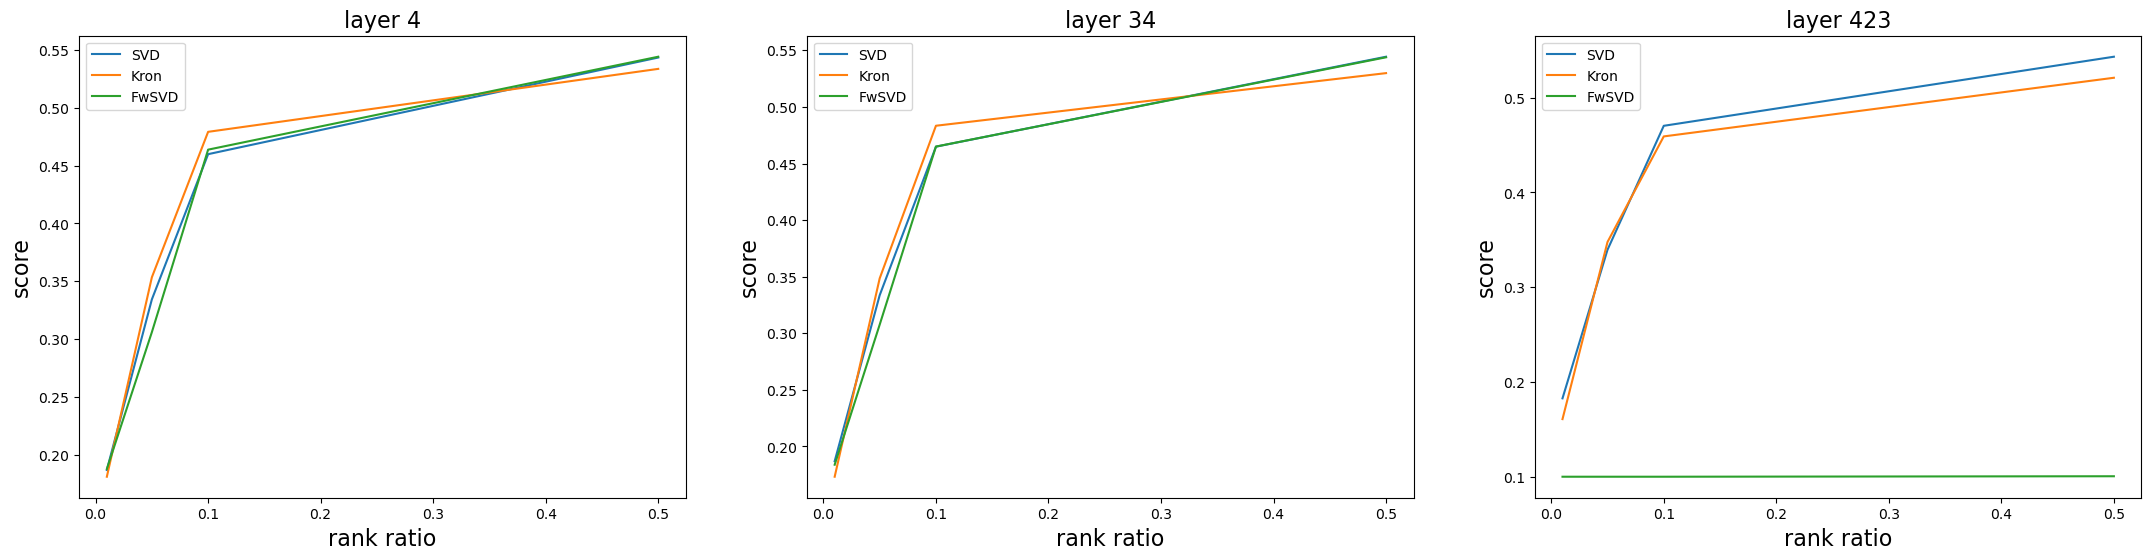

In [46]:
fig = plt.figure(figsize=(36, 6))
for i in range(1, 4):
    ax = plt.subplot(1, 4, i)
    # plot lines
    ax.plot(ranks_ratio, svd_l_2[i-1], label = "SVD")
    ax.plot(ranks_ratio, kron_l_2[i-1], label = "Kron")
    ax.plot(ranks_ratio, fwswd_l_2[i-1], label = "FwSVD")
    ax.legend()
    ax.set_xlabel('rank ratio',fontsize=16)
    ax.set_ylabel('score',fontsize=16)
    ax.set_title("layer " + list(d['svd'].keys())[i-1],fontsize=16)
    
plt.legend()
plt.show()